# Introduction

Nama : Aulia Firdatunnisa
Kode Peserta : PYTN-KS016-014

### Latar Belakang
Dataset ini berisi transaksi pengguna kartu kredit. Data ini digunakan untuk segmentasi pasar dengan tujuan unutk menentukan strategi pemasaran. 

### Data yang digunakan
Data ini berisi transaksi pengguna kartu kredit sebanyak 9000 orang. Data ini memiliki 18 atribut. Data ini diperoleh dari kaggle, dengan tautan sebagai berikut: https://www.kaggle.com/datasets/arjunbhasin2013/ccdata/data

### Overview
Final Project 4 ini dibuat guna mengevaluasi konsep Clustering sebagai berikut:
1. Mampu memahami konsep Clustering dengan menggunakan Scikit-Learn
2. Mampu mempersiapkan data untuk digunakan dalam Clustering
3. Mampu mengimplementasikan Clustering pada data yang diberikan

# Import Library

Mengimpor library-library yang dibutuhkan untuk melakukan analisis data.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings(action="ignore")

# Data Loading

In [3]:
df=pd.read_csv("CC_GENERAL.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Menampilkan informasi dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Menampilkan dimensi data

In [5]:
df.shape

(8950, 18)

# Data Cleaning

In [6]:
# Mengecek Missing Value
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Terdapat missing value pada kolom CREDIT_LIMIT dan MINIMUM_PAYMENTS. Terdapat 1 missing value pada kolom CREDIT_LIMIT, sehingga missing valuenya dihapus. Namun, pada kolom MINIMUM_PAYMENT terdapat 313 missing value, sehingga diisi dengan median.

In [7]:
# Penanganan Missing Value
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)
df.dropna(subset=['CREDIT_LIMIT'], inplace=True)
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [8]:
# Mengecek duplikasi data pada dataset
df.duplicated().sum()

0

Tidak terdapat duplikasi data pada dataset ini.

In [9]:
# Menghapus kolom yang tidak digunakan pada analisis data
df.drop(['CUST_ID'], axis=1, inplace=True)

Menghapus kolom CUST_ID karena tidak diperlukan dalam analisi data.

# Data Exploration

In [10]:
# Menampilkan 5 data teratas
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [11]:
# Menampilkan 5 data terbawah 
df.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,312.343947,0.00,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [12]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000
mean,1564.647593,0.877350,1003.316936,592.503572,411.113579,978.959616,0.490405,0.202480,0.364478,0.135141,3.249078,14.711476,4494.449450,1733.336511,844.999569,0.153732,11.517935
std,2081.584016,0.236798,2136.727848,1659.968851,904.378205,2097.264344,0.401360,0.298345,0.397451,0.200132,6.824987,24.858552,3638.815725,2895.168146,2332.906149,0.292511,1.337134
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.365782,0.888889,39.800000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.282850,170.875613,0.000000,12.000000
50%,873.680279,1.000000,361.490000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,857.062706,312.343947,0.000000,12.000000
75%,2054.372848,1.000000,1110.170000,577.830000,468.650000,1113.868654,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.279320,788.721609,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Terlihat banyak nilai ekstrim yang bermunculan. Oleh karena itu, kita tangani outliernya.

#### Histogram

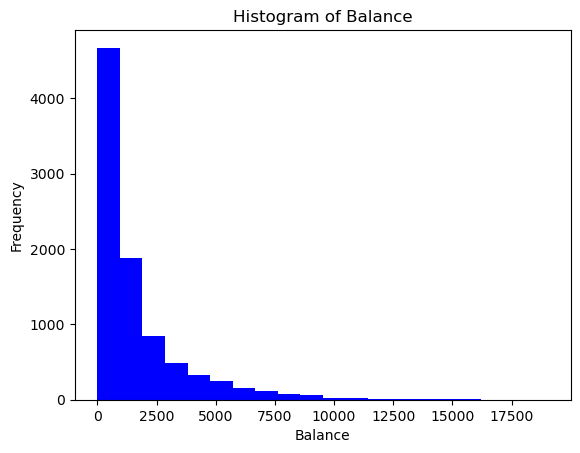

In [13]:
# Membuat histogram untuk kolom 'BALANCE'
plt.hist(df['BALANCE'], bins=20, color='blue')  # Bisa disesuaikan dengan jumlah bins yang diinginkan

# Menambahkan label dan judul
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.title('Histogram of Balance')

# Menampilkan histogram
plt.show()

Histogram tersebut menunjukkan bahwa jumlah saldo dikelompokkan dalam rentang tertentu. Rentang yang paling sering adalah antara 0 dan 2500. Rentang ini mencakup sekitar 60% dari data. Rentang yang kurang sering adalah antara 2500 dan 5000, antara 5000 dan 7500, dan seterusnya.

Kesimpulan yang dapat diambil dari gambar tersebut adalah bahwa jumlah saldo didistribusikan secara tidak merata. Sebagian besar saldo berada di rentang yang relatif rendah. Hal ini dapat disebabkan oleh berbagai faktor, seperti pendapatan, gaya hidup, dan pengeluaran.

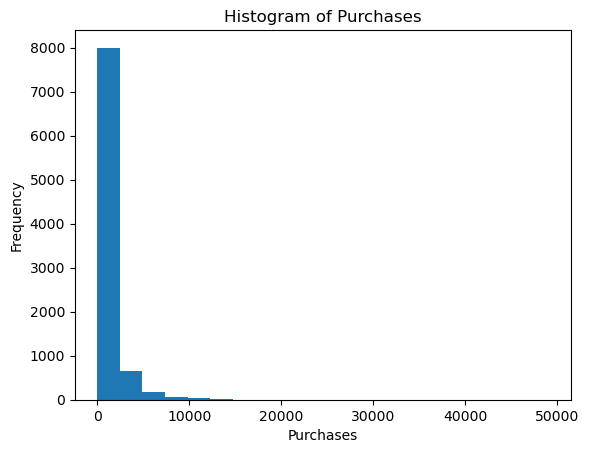

In [14]:
# Membuat histogram untuk kolom 'PURCHASES'
plt.hist(df['PURCHASES'], bins=20)

# Menambahkan label dan judul
plt.xlabel('Purchases')
plt.ylabel('Frequency')
plt.title('Histogram of Purchases')

# Menampilkan histogram
plt.show()

Histogram tersebut menunjukkan bahwa jumlah pembelian dikelompokkan dalam rentang tertentu. Rentang yang paling sering adalah antara 0 dan 20. Rentang ini mencakup sekitar 60% dari data. Rentang yang kurang sering adalah antara 20 dan 40, antara 40 dan 60, dan seterusnya.

Kesimpulan yang dapat diambil dari gambar tersebut adalah bahwa jumlah pembelian didistribusikan secara tidak merata. Sebagian besar pembelian berada di rentang yang relatif rendah. Hal ini dapat disebabkan oleh berbagai faktor, seperti pendapatan, gaya hidup, dan preferensi.

#### Scatterplot

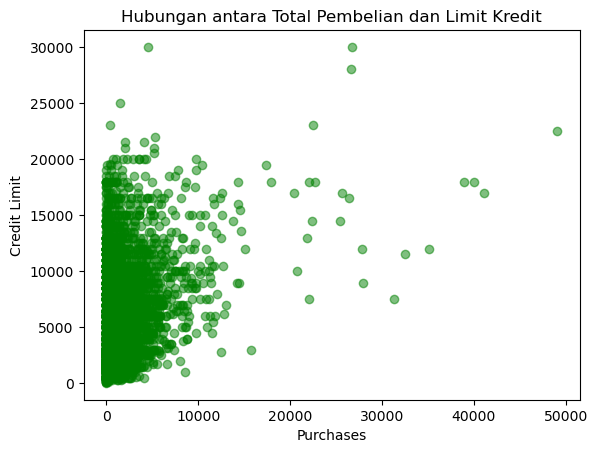

In [15]:
# Membuat scatter plot untuk hubungan antara 'PURCHASES' dan 'CREDIT_LIMIT'
plt.scatter(df['PURCHASES'], df['CREDIT_LIMIT'], color='green', alpha=0.5)  # Alpha mengatur transparansi titik

# Menambahkan label sumbu dan judul
plt.xlabel('Purchases')
plt.ylabel('Credit Limit')
plt.title('Hubungan antara Total Pembelian dan Limit Kredit')

# Menampilkan scatter plot
plt.show()

Diagram scatterplot tersebut menunjukkan bahwa terdapat hubungan positif antara total pembelian dan limit kredit. Artinya, semakin tinggi limit kredit, semakin tinggi pula total pembelian.

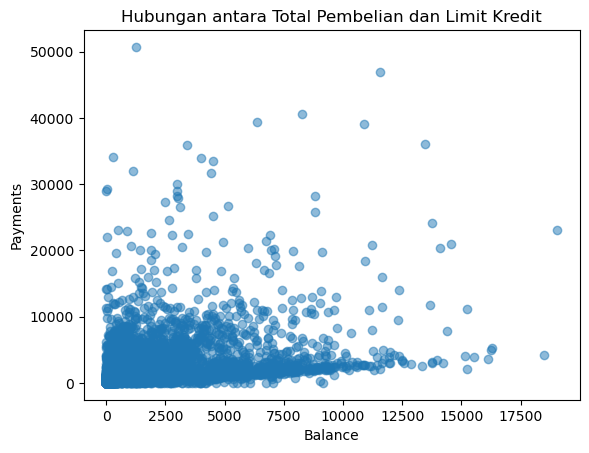

In [16]:
# Membuat scatter plot untuk hubungan antara 'BALANCE' dan 'PAYMENTS'
plt.scatter(df['BALANCE'], df['PAYMENTS'], alpha=0.5)  # Alpha mengatur transparansi titik

# Menambahkan label sumbu dan judul
plt.xlabel('Balance')
plt.ylabel('Payments')
plt.title('Hubungan antara Total Pembelian dan Limit Kredit')

# Menampilkan scatter plot
plt.show()

Berikut adalah beberapa poin penting yang dapat ditarik dari diagram scatterplot tersebut:
* Terdapat hubungan positif antara saldo bulanan dan limit kredit. Artinya, semakin tinggi limit kredit, semakin tinggi pula saldo bulanan.
* Faktor-faktor yang dapat mempengaruhi hubungan antara saldo bulanan dan limit kredit antara lain pendapatan, risiko kredit, dan pilihan produk dan jasa keuangan.

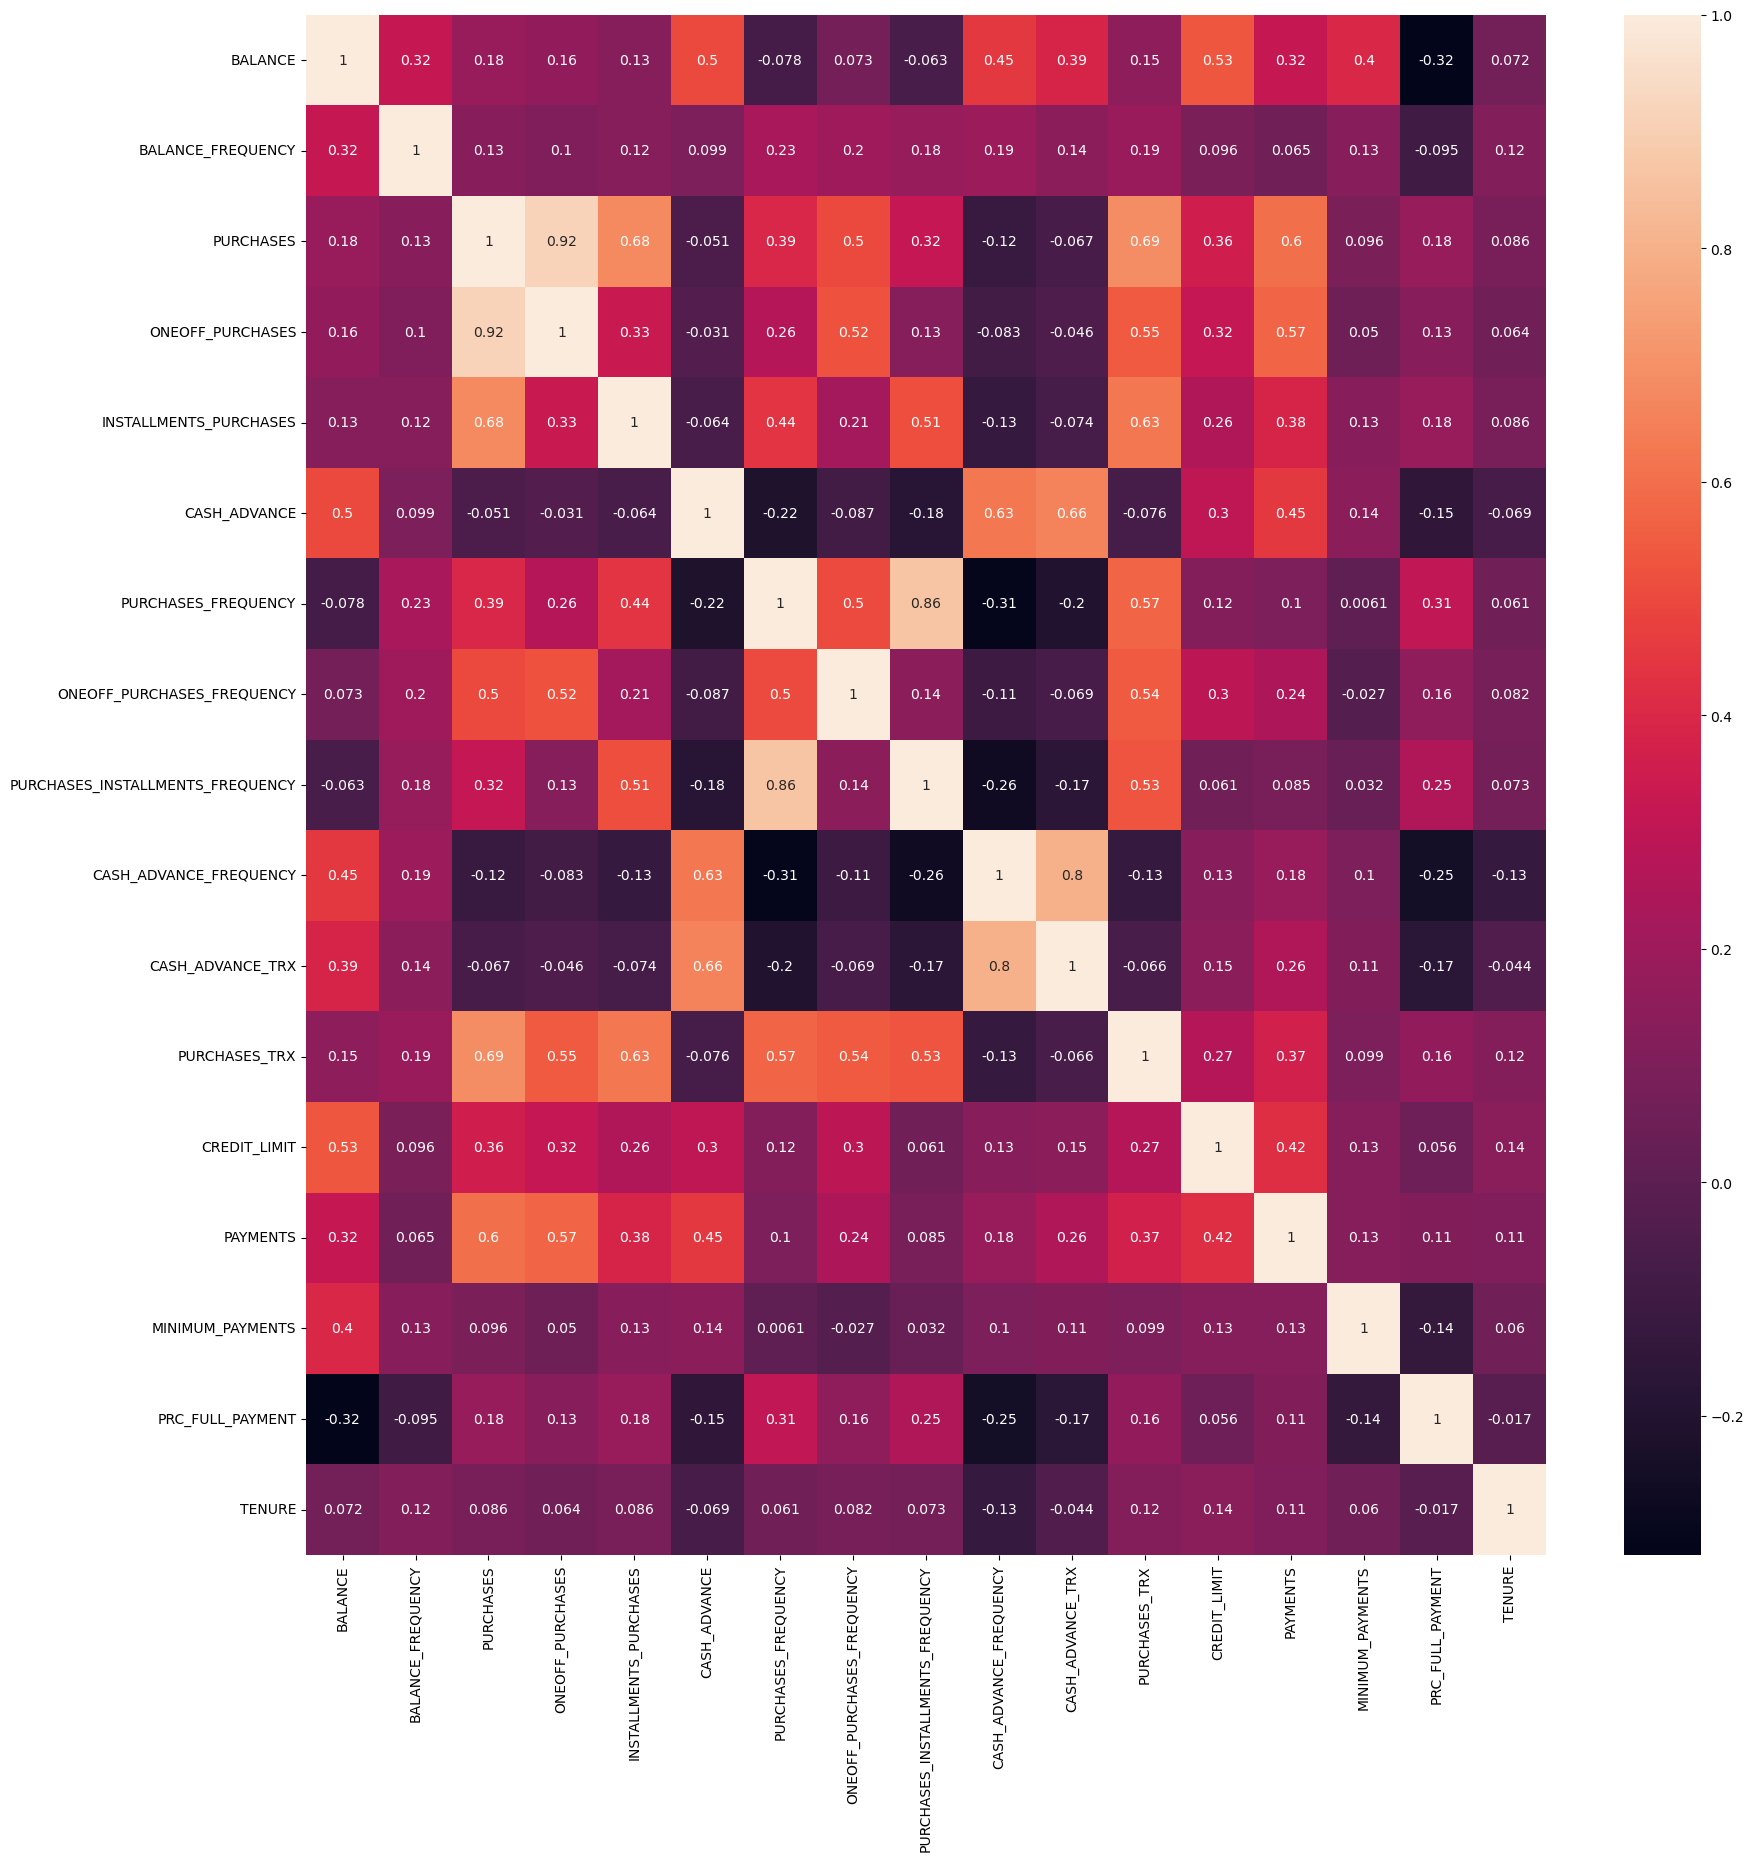

In [17]:
plt.figure(figsize=(20,20))
corr_df = df.corr()
sns.heatmap(corr_df,annot=True)
plt.show()

# Data Preprocessing

In [18]:
columns=['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT',
        'PAYMENTS', 'MINIMUM_PAYMENTS']

for c in columns:
    
    Range=c+'_RANGE'
    df[Range]=0        
    df.loc[((df[c]>0)&(df[c]<=500)),Range]=1
    df.loc[((df[c]>500)&(df[c]<=1000)),Range]=2
    df.loc[((df[c]>1000)&(df[c]<=3000)),Range]=3
    df.loc[((df[c]>3000)&(df[c]<=5000)),Range]=4
    df.loc[((df[c]>5000)&(df[c]<=10000)),Range]=5
    df.loc[((df[c]>10000)),Range]=6

In [19]:
columns=['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 
         'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT']

for c in columns:
    
    Range=c+'_RANGE'
    df[Range]=0
    df.loc[((df[c]>0)&(df[c]<=0.1)),Range]=1
    df.loc[((df[c]>0.1)&(df[c]<=0.2)),Range]=2
    df.loc[((df[c]>0.2)&(df[c]<=0.3)),Range]=3
    df.loc[((df[c]>0.3)&(df[c]<=0.4)),Range]=4
    df.loc[((df[c]>0.4)&(df[c]<=0.5)),Range]=5
    df.loc[((df[c]>0.5)&(df[c]<=0.6)),Range]=6
    df.loc[((df[c]>0.6)&(df[c]<=0.7)),Range]=7
    df.loc[((df[c]>0.7)&(df[c]<=0.8)),Range]=8
    df.loc[((df[c]>0.8)&(df[c]<=0.9)),Range]=9
    df.loc[((df[c]>0.9)&(df[c]<=1.0)),Range]=10

In [20]:
columns=['PURCHASES_TRX', 'CASH_ADVANCE_TRX']  

for c in columns:
    
    Range=c+'_RANGE'
    df[Range]=0
    df.loc[((df[c]>0)&(df[c]<=5)),Range]=1
    df.loc[((df[c]>5)&(df[c]<=10)),Range]=2
    df.loc[((df[c]>10)&(df[c]<=15)),Range]=3
    df.loc[((df[c]>15)&(df[c]<=20)),Range]=4
    df.loc[((df[c]>20)&(df[c]<=30)),Range]=5
    df.loc[((df[c]>30)&(df[c]<=50)),Range]=6
    df.loc[((df[c]>50)&(df[c]<=100)),Range]=7
    df.loc[((df[c]>100)),Range]=8

In [21]:
df.drop(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY',  'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT' ], axis=1, inplace=True)

X= np.asarray(df)

In [22]:
scale = StandardScaler()
X = scale.fit_transform(X)
X.shape

(8949, 17)

In [23]:
# Preprocessing data
data_scaled = MinMaxScaler().fit_transform(df)

# Pelatihan dan Permodelan

In [24]:
n_clusters=30
kmeans = KMeans(n_clusters)
cost=[]
for i in range(1,n_clusters):
    kmean= KMeans(i)
    kmean.fit(X)
    cost.append(kmean.inertia_)

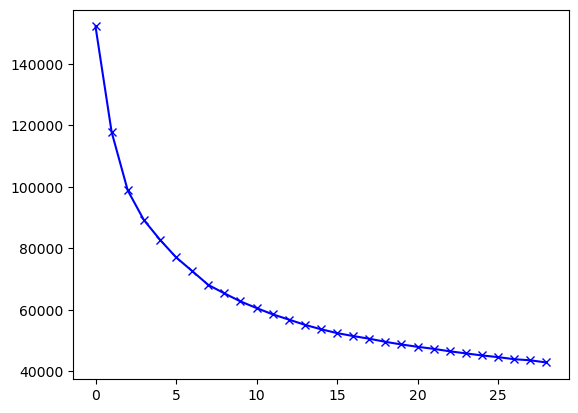

In [25]:
plt.plot(cost, 'bx-')

In [26]:
kmean= KMeans(6)
kmean.fit(X)
labels=kmean.labels_

In [28]:
clusters=pd.concat([df, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

,TENURE,BALANCE_RANGE,PURCHASES_RANGE,ONEOFF_PURCHASES_RANGE,INSTALLMENTS_PURCHASES_RANGE,CASH_ADVANCE_RANGE,CREDIT_LIMIT_RANGE,PAYMENTS_RANGE,MINIMUM_PAYMENTS_RANGE,BALANCE_FREQUENCY_RANGE,PURCHASES_FREQUENCY_RANGE,ONEOFF_PURCHASES_FREQUENCY_RANGE,PURCHASES_INSTALLMENTS_FREQUENCY_RANGE,CASH_ADVANCE_FREQUENCY_RANGE,PRC_FULL_PAYMENT_RANGE,PURCHASES_TRX_RANGE,CASH_ADVANCE_TRX_RANGE,cluster
0,12.0,1.0,1.0,0.0,1.0,0.0,2.0,1.0,1.0,9.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0
1,12.0,4.0,0.0,0.0,0.0,5.0,5.0,4.0,3.0,10.0,0.0,0.0,0.0,3.0,3.0,0.0,1.0,1.0
2,12.0,3.0,2.0,2.0,0.0,0.0,5.0,2.0,2.0,10.0,10.0,10.0,0.0,0.0,0.0,3.0,0.0,4.0
3,12.0,3.0,3.0,3.0,0.0,1.0,5.0,0.0,1.0,7.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,3.0
4,12.0,2.0,1.0,1.0,0.0,0.0,3.0,2.0,1.0,10.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0


# Visualisasi Cluster

In [33]:
dist = 1 - cosine_similarity(X)

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)
X_PCA.shape

(8949, 2)

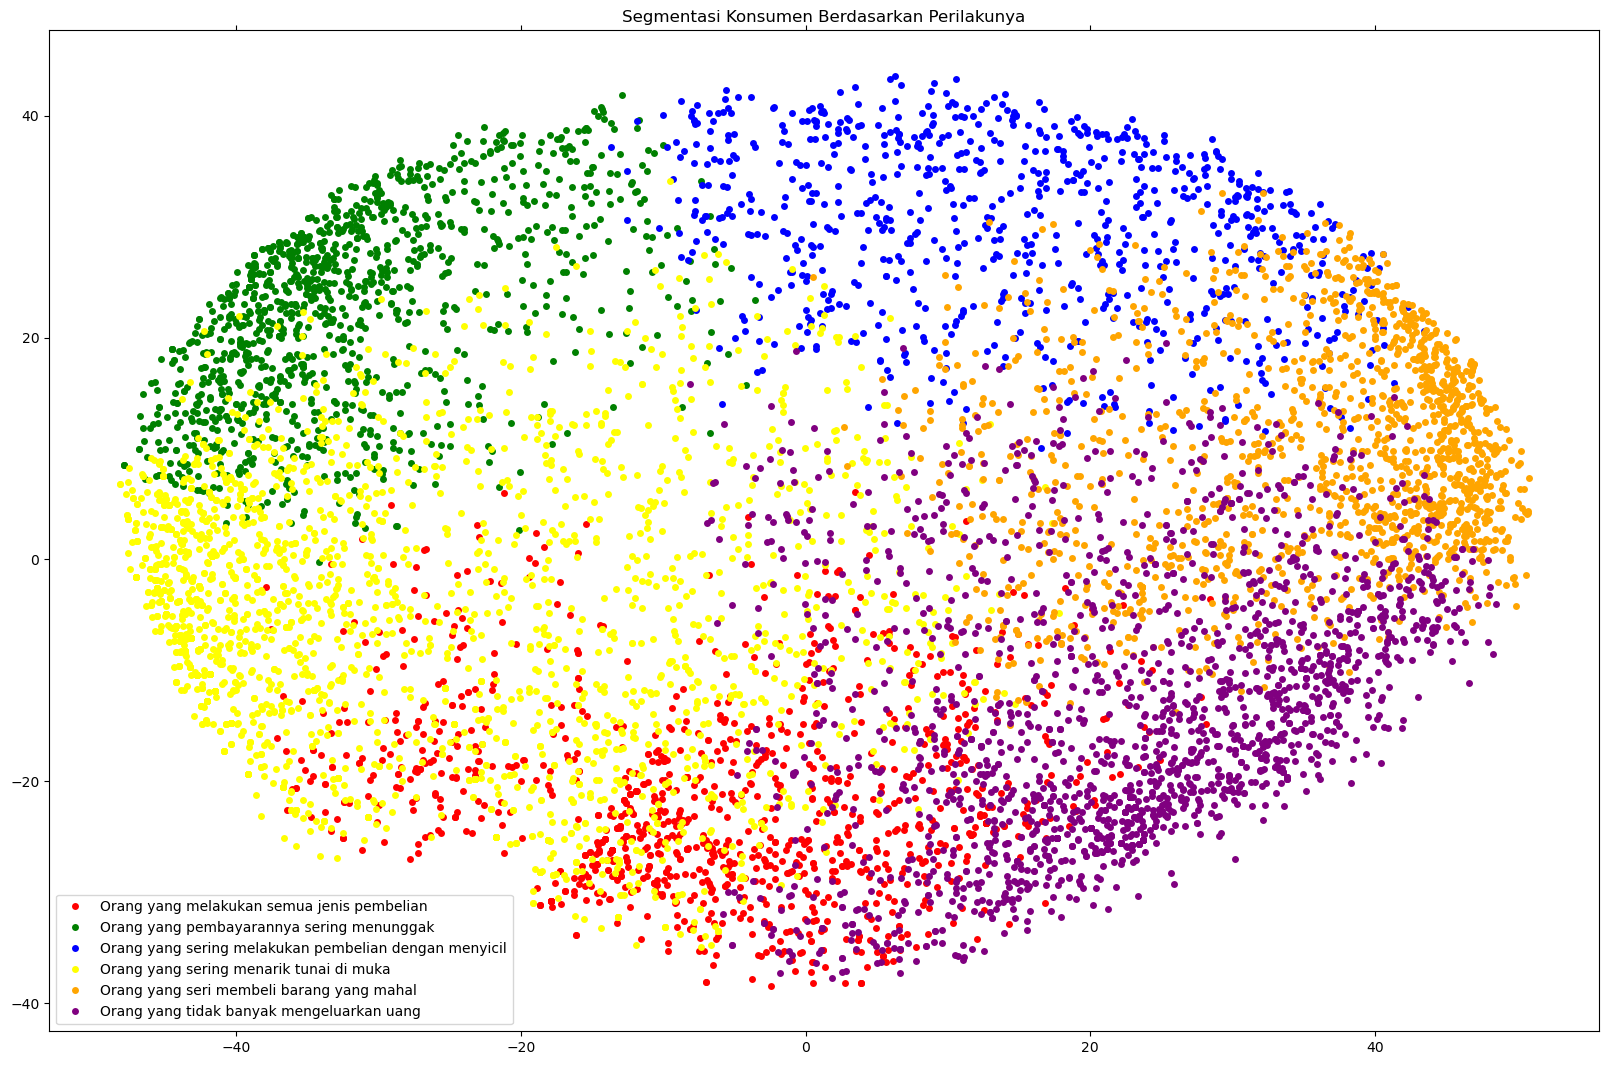

In [35]:
x, y = X_PCA[:, 0], X_PCA[:, 1]

colors = {0: 'red',
          1: 'green',
          2: 'blue', 
          3: 'yellow', 
          4: 'orange',  
          5: 'purple'}

names = {0: 'Orang yang melakukan semua jenis pembelian', 
         1: 'Orang yang pembayarannya sering menunggak', 
         2: 'Orang yang sering melakukan pembelian dengan menyicil', 
         3: 'Orang yang sering menarik tunai di muka', 
         4: 'Orang yang sering membeli barang yang mahal',
         5: 'Orang yang tidak banyak mengeluarkan uang'}
  
df = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Segmentasi Konsumen Berdasarkan Perilakunya")
plt.show()

# Pengambilan Kesimpulan

Diagram tersebut membagi konsumen menjadi lima kelompok, yaitu:
* Orang yang melakukan semua jenis pembelian
* Orang yang pembayarannya sering menunggak
* Orang yang sering melakukan pembelian dengan menyicil
* Orang yang sering menarik tunai di muka
* Orang yang sering membeli barang yang mahal
* Orang yang tidak banyak mengeluarkan uang

Masing-masing kelompok memiliki karakteristik perilaku yang berbeda. Kelompok "Orang yang melakukan semua jenis pembelian" adalah kelompok yang paling luas dan mencakup berbagai jenis konsumen. Kelompok "Orang yang pembayarannya sering menunggak" adalah kelompok yang memiliki risiko kredit yang tinggi. Kelompok "Orang yang sering melakukan pembelian dengan menyicil" adalah kelompok yang memiliki pola konsumsi yang terencana. Kelompok "Orang yang sering menarik tunai di muka" adalah kelompok yang memiliki kebutuhan dana tunai yang mendesak. Kelompok "Orang yang sen membeli barang yang mahal" adalah kelompok yang memiliki daya beli yang tinggi.